<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
tf.__version__

'2.0.0-beta1'

# Classifier Neural Network

In [0]:
data = load_breast_cancer ()

In [6]:
type (data)
dir (data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [0]:
X = data.data

In [0]:
y = data.target

In [0]:
scaler = StandardScaler ()
X_scale = scaler.fit_transform (X)
X_train, X_test, y_train, y_test = train_test_split (X_scale, y, test_size=0.20, random_state=23)

In [0]:
data.target_names

In [0]:
N, D = X_train.shape
layers_r =  [tf.keras.layers.Input(shape=(D,)), 
           tf.keras.layers.Dense(D/3, activation='relu'),
           tf.keras.layers.Dense(1, activation='sigmoid')]
classifier = tf.keras.models.Sequential (layers_r)

In [0]:
classifier.compile (optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


In [21]:
len (X_train)

455

In [0]:
%%capture
c = classifier.fit (X_train, y_train, validation_data=(X_test, y_test), epochs=100)

In [27]:
print ('Training Set Evaluation : ' + str(classifier.evaluate (X_train, y_train)))
print ('Test Set Evaluation : ' + str(classifier.evaluate (X_test, y_test)))

455/455 [==============================] - 0s 61us/sample - loss: 0.0126 - accuracy: 0.9956
Training Set Evaluation : [0.012634352529114419, 0.9956044]
114/114 [==============================] - 0s 53us/sample - loss: 0.0546 - accuracy: 0.9912
Test Set Evaluation : [0.05461776678515762, 0.99122804]


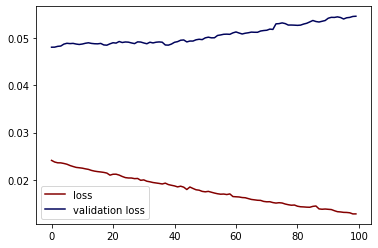

In [30]:
plt.plot (c.history['loss'], label='loss', color='#840000')
plt.plot (c.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

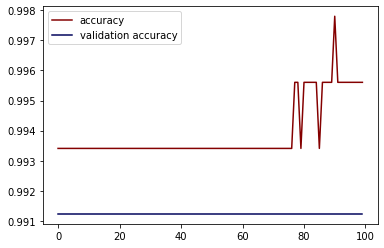

In [31]:
plt.plot (c.history['accuracy'], label='accuracy', color='#840000')
plt.plot (c.history['val_accuracy'], label='validation accuracy', color='#00035b')
plt.legend ()

### Observations

1. Odd accuracy and loss graphing, however compared to usual Neural Networks (comparing using accuracy) classifier model nearly got 99% representation given the data. It didn't actually nead multiple epochs - this was overkill.